In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.cm import get_cmap

cmap = get_cmap("coolwarm").copy()
cmap = get_cmap("Wistia").copy()
cmap = get_cmap("gist_rainbow").copy()
cmap = get_cmap("Blues").copy()
cmap.set_under(color='black')    


/var/folders/9n/yxn6g0xn02q48jb1vzdss0hm0000gn/T/ipykernel_40768/2178531221.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("coolwarm").copy()
/var/folders/9n/yxn6g0xn02q48jb1vzdss0hm0000gn/T/ipykernel_40768/2178531221.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Wistia").copy()
/var/folders/9n/yxn6g0xn02q48jb1vzdss0hm0000gn/T/ipykernel_40768/2178531221.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("gist_rainbow

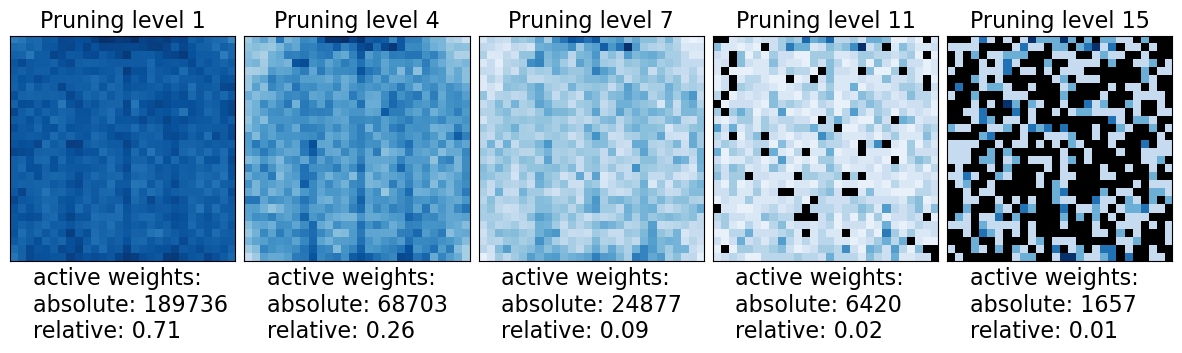

In [5]:
iters = list(range(19))
iters = [ 1, 4, 7, 11, 15]
fig, axs = plt.subplots(1, len(iters), figsize=(len(iters)*3,3))
N = len(nx.read_graphml(f'fashion-graphs/unpruned-{0}.graphml').edges())
for iter, ax in zip(iters, axs):
    G = nx.read_graphml(f'fashion-graphs/unpruned-{iter}.graphml')

    input_layer = [node for node, data in G.nodes(data=True) if data['layer'] == 0]
    x = np.zeros((784))
    for node in input_layer:
        i = int(node.replace(' ', '').replace(')', '').replace('(', '').split(',')[1])
        x[i] = G.out_degree(node)

    img = ax.imshow(x.reshape(28, 28), cmap=cmap, vmin=0.000000001)
    ax.set_title(f'Pruning level {iter}', fontsize=16)
    act = len(G.edges())
    ax.set_xlabel(f'active weights:\nabsolute: {act}\nrelative: {act / N:.2f}', fontsize=16, horizontalalignment='left', x=0.1)
    ax.set_xticks([]), ax.set_yticks([])
plt.subplots_adjust(wspace=.04)
plt.savefig('fashion_input_attention_active.png', bbox_inches='tight')
plt.show()

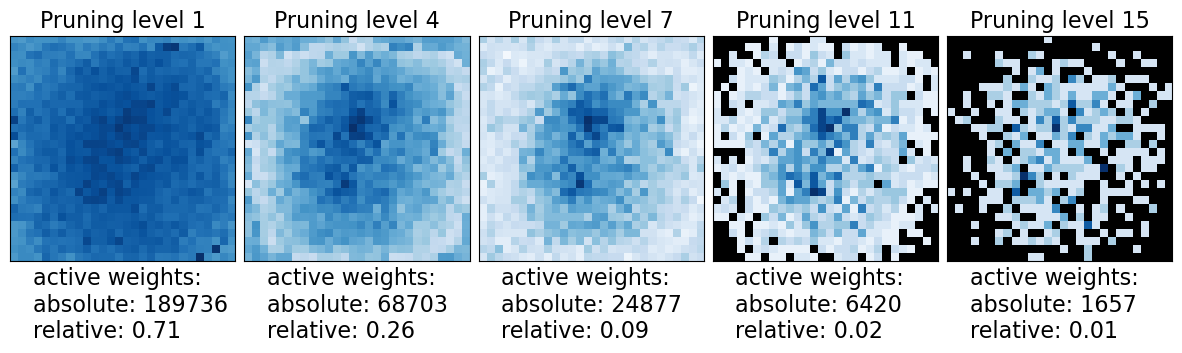

In [6]:
iters = list(range(19))
iters = [ 1, 4, 7, 11, 15]
fig, axs = plt.subplots(1, len(iters), figsize=(len(iters)*3,3))
N = len(nx.read_graphml(f'mnist-graphs/unpruned-{0}.graphml').edges())
for iter, ax in zip(iters, axs):
    G = nx.read_graphml(f'mnist-graphs/unpruned-{iter}.graphml')

    input_layer = [node for node, data in G.nodes(data=True) if data['layer'] == 0]
    x = np.zeros((784))
    for node in input_layer:
        i = int(node.replace(' ', '').replace(')', '').replace('(', '').split(',')[1])
        x[i] = G.out_degree(node)

    img = ax.imshow(x.reshape(28, 28), cmap=cmap, vmin=0.000000001)
    ax.set_title(f'Pruning level {iter}', fontsize=16)
    act = len(G.edges())
    ax.set_xlabel(f'active weights:\nabsolute: {act}\nrelative: {act / N:.2f}', fontsize=16, horizontalalignment='left', x=0.1)
    ax.set_xticks([]), ax.set_yticks([])
plt.subplots_adjust(wspace=.04)
plt.savefig('mnist_input_attention_active.png', bbox_inches='tight')
plt.show()

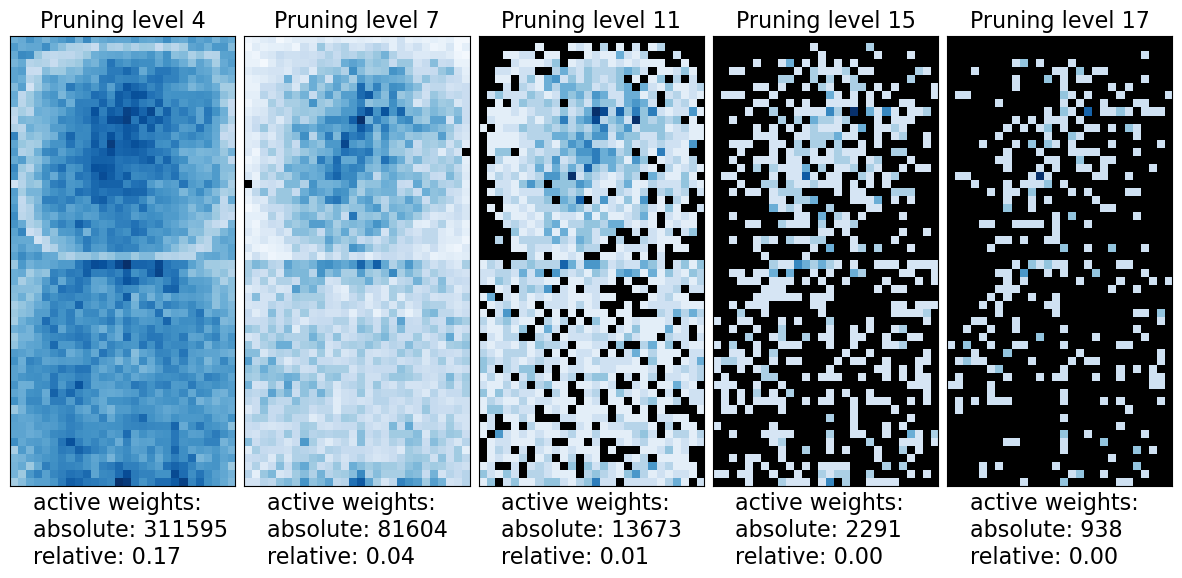

In [7]:
iters = list(range(19))
iters = [ 4, 7, 11, 15, 17]
fig, axs = plt.subplots(1, len(iters), figsize=(len(iters)*3,6))
N = len(nx.read_graphml(f'mnist-fashion-mnist-graphs/unpruned-{0}.graphml').edges())
for iter, ax in zip(iters, axs):
    G = nx.read_graphml(f'mnist-fashion-mnist-graphs/unpruned-{iter}.graphml')

    input_layer = [node for node, data in G.nodes(data=True) if data['layer'] == 0]
    x = np.zeros((784*2))
    for node in input_layer:
        i = int(node.replace(' ', '').replace(')', '').replace('(', '').split(',')[1])
        x[i] = G.out_degree(node)

    img = ax.imshow(x.reshape(56, 28), cmap=cmap, vmin=0.000000001)
    ax.set_title(f'Pruning level {iter}', fontsize=16)
    act = len(G.edges())
    ax.set_xlabel(f'active weights:\nabsolute: {act}\nrelative: {act / N:.2f}', fontsize=16, horizontalalignment='left', x=0.1)
    ax.set_xticks([]), ax.set_yticks([])
plt.subplots_adjust(wspace=.04)
plt.savefig('mnist_fashion_mnist_input_attention_active.png', bbox_inches='tight')
plt.show()